<a href="https://colab.research.google.com/github/amitkumar981/Learn_RAG/blob/master/autonomous_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv(override=True)

os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')

In [ ]:
#configure the llm
from langchain.chat_models import init_chat_model

llm = init_chat_model(model = 'gpt-4o-mini',temperature=0.2)
llm

ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x0000024B611BB610>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000024B611BBC50>, root_client=<openai.OpenAI object at 0x0000024B6159EF10>, root_async_client=<openai.AsyncOpenAI object at 0x0000024B6159E250>, model_name='gpt-4o-mini', temperature=0.2, model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [ ]:
llm.invoke('hii')

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'id': 'chatcmpl-CrKo8hXZOC4JhD9PwbvMV56jVfuVu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b5f1e-a9c5-71d0-b631-5df698d3f1ed-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
from typing import List, TypedDict, Optional
from langchain_core.documents import Document

class RAGState(TypedDict):
    original_query: str
    optimized_query: Optional[str]
    sub_queries: List[str]
    retrieved_docs: List[Document]
    answer: str
    grade: Optional[str]
    retry_count: int

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
#document loading
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/",
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]
docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry Lang

In [ ]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retriever=vectorstore.as_retriever()

In [ ]:
retriever.invoke("what is langchain")

[Document(id='f6f8bba8-222e-49e9-8742-84e3e919dde9', metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesGet helpOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCopy pageCopy pag

In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun()
search_tool.run("what is langchain")

'LangChain helps you ship quickly with less code using a pre-built agent architecture and model integrations.See exactly what your agent is doing. What is LangChain ?IBM Technology593K views • 1 year agoLivePlaylist ()Mix (50+). 26:03. The LangChain Cookbook Part 2 - Beginner Guide To 9 Use CasesGreg Kamradt85K views... LangChain makes it easy to connect LLMs like OpenAI’s GPT-4 Turbo, Claude, Mistral, and Llama to various knowledge sources. Which LLM Does LangChain Use? LangChain is a cutting-edge language learning platform that leverages the power of technology, artificial intelligence, and community collaboration to provide learners with an immersive... What is LangChain . Describe What You Want to Automate. Latenode will turn your prompt into a ready-to-run workflow in seconds. Enter a message.'

In [ ]:
from langchain_core.prompts import PromptTemplate

def query_optimizer(state):
    """Optimize the user query for better retrieval"""

    print("OPTIMIZING QUERY....")

    question = state["original_query"]

    prompt = PromptTemplate(
        template="""
Rewrite the following query to make it clearer and more specific for information retrieval.
Do not change the original meaning.
Do not answer the question.

Query:
{question}

Return only the improved query.
""",
        input_variables=["question"]
    )

    response = llm.invoke(prompt.format(question=question))

    return {
        "original_query": question,
        "optimized_query": response.content
    }

In [ ]:
test_state = {
    "original_query": "Explain RAG"
}

In [ ]:
result = query_optimizer(test_state)
print(result)

OPTIMIZING QUERY....
{'original_query': 'Explain RAG', 'optimized_query': 'Provide a detailed explanation of the term "RAG," including its definition, context, and any relevant applications or examples.'}


In [ ]:
test_state

{'original_query': 'Explain RAG'}

In [ ]:
from langchain_core.prompts import PromptTemplate

def plan_steps(state):
    """Decompose the optimized query into sub-queries"""
    print("PLANNING STEPS....")

    prompt = PromptTemplate(
        template="""
Break the following optimized query into 2–3 clear, reasonable steps
required to answer it.
Do not answer the query.

Optimized Query:
{optimized_query}

Return each step on a new line.
""",
        input_variables=["optimized_query"]
    )

    optimized_query = state["optimized_query"]

    response = llm.invoke(
        prompt.format(optimized_query=optimized_query)
    )

    subqs = [line.strip("- ").strip() for line in response.content.split("\n") if line.strip()]

    return {"sub_queries": subqs}




In [ ]:
def retriever_per_step(state:dict) -> dict:
    """Retrieve documents for each sub query"""
    print("RETRIEVING DOCUMENTS....")
    all_docs= []
    sub_queries = state["sub_queries"]
    for query in sub_queries:
        docs = retriever.invoke(query)
        all_docs.extend(docs)
        return {"retrieved_docs": all_docs}


In [ ]:
#def generate response
def generate_response(state):
    """generate answer based on retrieved documents"""
    print("GENERATING RESPONSE....")
    context = "\n\n".join([doc.page_content for doc in state["retrieved_docs"]])
    prompt = PromptTemplate(
        template="""You are answering a complex question using retrieved documents.

Question:
{question}

Relevant Information:
{context}

Now synthesize a clear, accurate, and well-reasoned final answer.
""",
        input_variables=["question", "context"]
    )

    response = llm.invoke(prompt.format(question=state["original_query"],context=context))
    return {"answer": response.content.strip()}

In [ ]:
from typing import Literal
from pydantic import BaseModel, Field

def evaluate_response(state):
    print("EVALUATING RESPONSE....")

    class Grade(BaseModel):
        score: Literal["yes", "no"]

    model = llm.with_structured_output(Grade)

    prompt = f"""
Question:
{state["original_query"]}

Answer:
{state["answer"]}

Is the answer correct and complete?
Respond with yes or no.
"""

    response = model.invoke(prompt)

    retry = state.get("retry_count", 0) + 1
    grade = "approve" if response.score == "yes" else "rewrite"


    return {
        "grade": grade,
        "retry_count": retry
    }




In [ ]:
def route_response(state) -> Literal["finalize", "rewrite"]:
    print("ROUTING RESPONSE....")

    if state["grade"] == "approve":
        return "finalize"

    if state["retry_count"] >= 3:
        print("MAX RETRIES — FINALIZING BEST ANSWER")
        return "finalize"

    return "rewrite"

In [ ]:
def rewrite(state):
    """Rewrite the user query to improve document retrieval"""
    print("REWRITING QUERY....")
    question = state["original_query"]
    prompt = PromptTemplate(
        template=f""" Look at the input and try to reason about the underlying semantic intent / meaning. \n
    Here is the initial question:
    \n ------- \n
    {question}
    \n ------- \n
    Rewrite the question to make it more specific and clear for information retrieval.
    Do not change the original meaning.
    Do not answer the question.
    """
    )
    response = llm.invoke(prompt.format(question=question))
    return {"rewritten_query": response.content.strip()}


In [ ]:
def finalize(state):
    print("FINALIZING ANSWER....")
    return {"answer": state["answer"]}

In [ ]:
from langgraph.graph import StateGraph, START, END
workflow = StateGraph(RAGState)

# Nodes
workflow.add_node("query_optimizer", query_optimizer)
workflow.add_node("plan_steps", plan_steps)
workflow.add_node("retrieval", retriever_per_step)
workflow.add_node("generate_response", generate_response)
workflow.add_node("evaluate_response", evaluate_response)
workflow.add_node("rewrite", rewrite)
workflow.add_node("finalize", finalize)

# Linear flow
workflow.add_edge(START, "query_optimizer")
workflow.add_edge("query_optimizer", "plan_steps")
workflow.add_edge("plan_steps", "retrieval")
workflow.add_edge("retrieval", "generate_response")
workflow.add_edge("generate_response", "evaluate_response")

# ✅ Conditional routing (router is NOT a node)
workflow.add_conditional_edges(
    "evaluate_response",
    route_response,
    {
        "finalize": "finalize",
        "rewrite": "rewrite",
    }
)

# Loop
workflow.add_edge("rewrite", "query_optimizer")
workflow.add_edge("finalize", END)



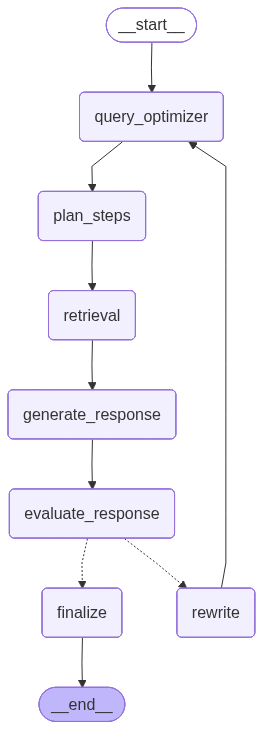

In [ ]:
graph_builder=workflow.compile()
graph_builder

In [ ]:
query = "explain  working of langgraph"
state = RAGState(original_query=query)
result = graph_builder.invoke(state)

print("\n===== FINAL STATE =====")
for key, value in result.items():
    print(f"\n{key}: {value}")


OPTIMIZING QUERY....


PLANNING STEPS....
RETRIEVING DOCUMENTS....
GENERATING RESPONSE....
EVALUATING RESPONSE....
ROUTING RESPONSE....
FINALIZING ANSWER....

===== FINAL STATE =====

original_query: explain  working of langgraph

optimized_query: Provide a detailed explanation of how LangGraph functions and its key components.

sub_queries: ['1. Research and gather information about LangGraph, including its purpose, functionality, and applications in various contexts.', '2. Identify and describe the key components of LangGraph, explaining their roles and how they interact within the system.', '3. Compile the gathered information into a coherent and detailed explanation that outlines how LangGraph functions as a whole.']

retrieved_docs: [Document(id='85ab2273-d30f-413b-9d3d-aa7cb7c01ddc', metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='We can see the full sequence of steps, along with latenc